# US CRUDE OIL DATA IMPORTS

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("us_crude_oil_data.csv")

In [3]:
df.head()

,year,month,originName,originTypeName,destinationName,destinationTypeName,gradeName,quantity
0,2009,1,Belize,Country,EXXONMOBIL REFINING & SPLY CO / BEAUMONT / TX,Refinery,Light Sour,61
1,2009,1,Belize,Country,FLINT HILLS RESOURCES LP / WEST / TX,Refinery,Light Sour,62
2,2009,1,Algeria,Country,SHELL OIL PRODUCTS US / ST ROSE / LA,Refinery,Light Sweet,10
3,2009,1,Algeria,Country,OIL TANKING PL INC / HOUSTON (GULF) / TX,Refinery,Light Sweet,381
4,2009,1,Algeria,Country,UNKNOWN PROCESSOR-TX / UNKNOWN PROCESSOR-TX / TX,Refinery,Light Sweet,851


In [4]:
df.tail()

,year,month,originName,originTypeName,destinationName,destinationTypeName,gradeName,quantity
483048,2024,1,World,World,United States,United States,Heavy Sour,120942
483049,2024,1,World,World,United States,United States,Heavy Sweet,8859
483050,2024,1,World,World,United States,United States,Light Sour,7811
483051,2024,1,World,World,United States,United States,Light Sweet,12553
483052,2024,1,World,World,United States,United States,Medium,55237


In [5]:
print("There are ",df.shape[0], " rows and ", df.shape[1], " columns in the dataset")

There are  483053  rows and  8  columns in the dataset


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483053 entries, 0 to 483052
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   year                 483053 non-null  int64 
 1   month                483053 non-null  int64 
 2   originName           483053 non-null  object
 3   originTypeName       483053 non-null  object
 4   destinationName      483053 non-null  object
 5   destinationTypeName  483053 non-null  object
 6   gradeName            483053 non-null  object
 7   quantity             483053 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 29.5+ MB


In [7]:
df.dtypes

year                    int64
month                   int64
originName             object
originTypeName         object
destinationName        object
destinationTypeName    object
gradeName              object
quantity                int64
dtype: object

In [8]:
df["month"].values

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [9]:
# Lets convert the month to month name for better readibilty
from datetime import datetime

In [10]:
def numeric_to_month_name(month):
    return datetime.strptime(str(month), "%m").strftime("%B")

In [11]:
# Apply the function to the 'month' column
df['month'] = df['month'].apply(numeric_to_month_name)

In [12]:
df.head()

,year,month,originName,originTypeName,destinationName,destinationTypeName,gradeName,quantity
0,2009,January,Belize,Country,EXXONMOBIL REFINING & SPLY CO / BEAUMONT / TX,Refinery,Light Sour,61
1,2009,January,Belize,Country,FLINT HILLS RESOURCES LP / WEST / TX,Refinery,Light Sour,62
2,2009,January,Algeria,Country,SHELL OIL PRODUCTS US / ST ROSE / LA,Refinery,Light Sweet,10
3,2009,January,Algeria,Country,OIL TANKING PL INC / HOUSTON (GULF) / TX,Refinery,Light Sweet,381
4,2009,January,Algeria,Country,UNKNOWN PROCESSOR-TX / UNKNOWN PROCESSOR-TX / TX,Refinery,Light Sweet,851


In [13]:
# Check for null values
df.isnull().sum()

year                   0
month                  0
originName             0
originTypeName         0
destinationName        0
destinationTypeName    0
gradeName              0
quantity               0
dtype: int64

In [14]:
df.describe()

,year,quantity
count,483053.000000,483053.000000
mean,2015.388875,2425.239876
std,4.295262,6367.700629
min,2009.000000,1.000000
25%,2012.000000,359.000000
50%,2015.000000,804.000000
75%,2019.000000,2008.000000
max,2024.000000,141016.000000


In [15]:
# df['originTypeName'].values

In [16]:
df[['year','quantity']]

,year,quantity
0,2009,61
1,2009,62
2,2009,10
3,2009,381
4,2009,851
...,...,...
483048,2024,120942
483049,2024,8859
483050,2024,7811
483051,2024,12553


# LET'S EXPLORE THE DATA TO GET INSIGHTS

In [17]:
# Which country export more crude oil to the US?
df[['year','originName','destinationTypeName','quantity']]

,year,originName,destinationTypeName,quantity
0,2009,Belize,Refinery,61
1,2009,Belize,Refinery,62
2,2009,Algeria,Refinery,10
3,2009,Algeria,Refinery,381
4,2009,Algeria,Refinery,851
...,...,...,...,...
483048,2024,World,United States,120942
483049,2024,World,United States,8859
483050,2024,World,United States,7811
483051,2024,World,United States,12553


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
country_quantities = df.groupby('originName')['quantity'].sum()

In [71]:
df['originName'].tolist()

['Belize',
 'Belize',
 'Algeria',
 'Algeria',
 'Algeria',
 'Algeria',
 'Algeria',
 'Algeria',
 'Algeria',
 'Algeria',
 'Algeria',
 'Algeria',
 'Algeria',
 'Algeria',
 'Algeria',
 'Australia',
 'Australia',
 'United Kingdom',
 'Vietnam',
 'Syria',
 'Chad',
 'Chad',
 'Chad',
 'Chad',
 'Argentina',
 'Argentina',
 'Argentina',
 'Ecuador',
 'Ecuador',
 'Ecuador',
 'Ecuador',
 'Ecuador',
 'Ecuador',
 'Ecuador',
 'Ecuador',
 'Ecuador',
 'Ecuador',
 'Ecuador',
 'Ecuador',
 'Kuwait',
 'Kuwait',
 'Kuwait',
 'Kuwait',
 'Kuwait',
 'Kuwait',
 'Kuwait',
 'Kuwait',
 'Kuwait',
 'Kuwait',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabi

In [20]:
country_quantities

originName
Africa             28430339
Albania               34741
Algeria             3098956
Angola              6148919
Argentina           1112076
                    ...    
United Kingdom      1631665
Venezuela          22031954
Vietnam              264978
World             292894791
Yemen                 20524
Name: quantity, Length: 70, dtype: int64

In [21]:
country_quantities_sorted = country_quantities.sort_values(ascending=False)

In [22]:
country_quantities_sorted.head()

originName
World              292894791
Non-OPEC           198217089
Canada (Region)    119406217
Canada             119406217
OPEC                94647819
Name: quantity, dtype: int64

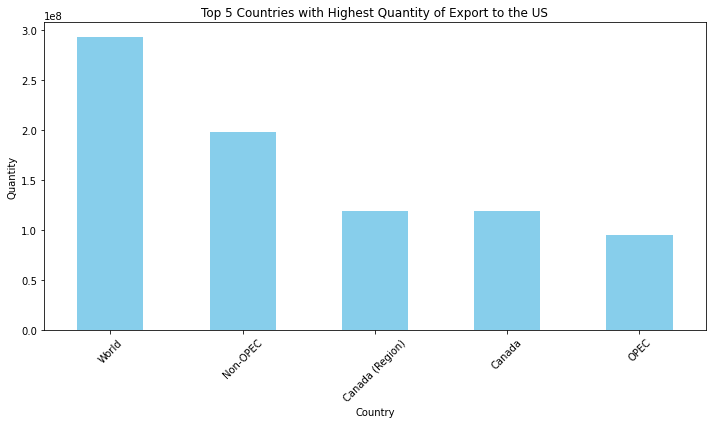

In [23]:
# Select top 5 countries
top_5_countries = country_quantities_sorted.head(5)

# Plot the quantities for top 5 countries
plt.figure(figsize=(10, 6))
top_5_countries.plot(kind='bar', color='skyblue')
plt.title('Top 5 Countries with Highest Quantity of Export to the US')
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
least_5_countries = country_quantities_sorted.tail(5)

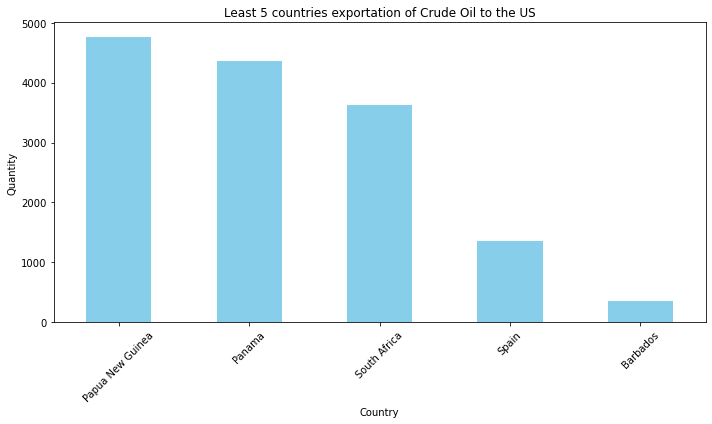

In [25]:
# Plot the quantities for least 5 countries
plt.figure(figsize = (10, 6))
least_5_countries.plot(kind = "bar", color = "skyblue")
plt.title("Least 5 countries exportation of Crude Oil to the US")
plt.xlabel("Country")
plt.ylabel("Quantity")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [26]:
# df['originName'].tolist()

In [27]:
# In which year has US imported more crude oil?

In [28]:
year_quantity = df.groupby("year")['quantity'].sum()

In [29]:
year_quantity

year
2009    95269076
2010    97581904
2011    93872828
2012    86378796
2013    78700272
2014    75049128
2015    75247452
2016    80446408
2017    81483304
2018    79381288
2019    69253016
2020    60324572
2021    62620782
2022    64215886
2023    65943430
2024     5751256
Name: quantity, dtype: int64

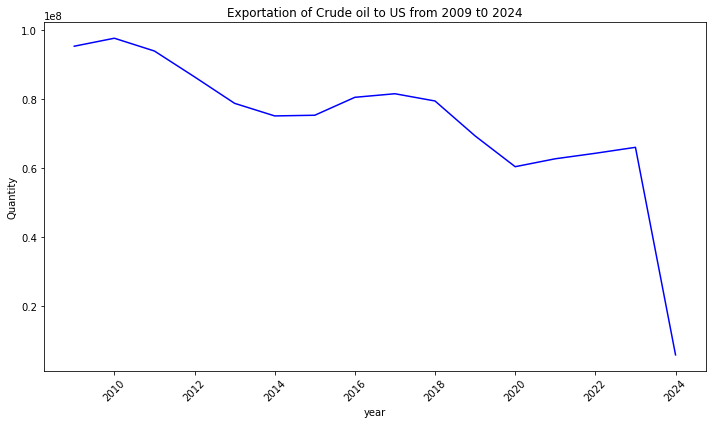

In [30]:
plt.figure(figsize=(10, 6))
year_quantity.plot(kind='line', color='blue')
plt.title('Exportation of Crude oil to US from 2009 t0 2024')
plt.xlabel('year')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
df["originName"].tolist()

['Belize',
 'Belize',
 'Algeria',
 'Algeria',
 'Algeria',
 'Algeria',
 'Algeria',
 'Algeria',
 'Algeria',
 'Algeria',
 'Algeria',
 'Algeria',
 'Algeria',
 'Algeria',
 'Algeria',
 'Australia',
 'Australia',
 'United Kingdom',
 'Vietnam',
 'Syria',
 'Chad',
 'Chad',
 'Chad',
 'Chad',
 'Argentina',
 'Argentina',
 'Argentina',
 'Ecuador',
 'Ecuador',
 'Ecuador',
 'Ecuador',
 'Ecuador',
 'Ecuador',
 'Ecuador',
 'Ecuador',
 'Ecuador',
 'Ecuador',
 'Ecuador',
 'Ecuador',
 'Kuwait',
 'Kuwait',
 'Kuwait',
 'Kuwait',
 'Kuwait',
 'Kuwait',
 'Kuwait',
 'Kuwait',
 'Kuwait',
 'Kuwait',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabi

In [32]:
df.head(3)

,year,month,originName,originTypeName,destinationName,destinationTypeName,gradeName,quantity
0,2009,January,Belize,Country,EXXONMOBIL REFINING & SPLY CO / BEAUMONT / TX,Refinery,Light Sour,61
1,2009,January,Belize,Country,FLINT HILLS RESOURCES LP / WEST / TX,Refinery,Light Sour,62
2,2009,January,Algeria,Country,SHELL OIL PRODUCTS US / ST ROSE / LA,Refinery,Light Sweet,10


In [33]:
# Which destination recieved more quantity of crude oil
qty_by_dest = df.groupby('destinationName')['quantity'].sum()
qty_by_dest

destinationName
ADJ CO-IL / IMPUTE ADJ - IL / IL                              900
ADJ CO-LA GULF / IMPUTE ADJ - LA GULF / LA                   1116
ALON REFINING KROTZ SPGS INC / KROTZ SPRINGS / LA            2992
AMERADA HESS CORP / NEW YORK / NY                             192
AMERICAN REFINING GROUP INC / BRADFORD / PA                  4632
                                                           ...   
Wilmington, DE                                            2060120
Wisconsin                                                  679896
Wyoming                                                   1872540
ZENITH ENERGY TERMINALS HOLDINGS LLC / CHICKASAW / AL         760
ZENITH ENERGY TERMINALS HOLDINGS LLC / WILLBRIDGE / OR       5076
Name: quantity, Length: 456, dtype: int64

In [34]:
qty_by_dest_sorted = qty_by_dest.sort_values(ascending=False)

In [35]:
qty_by_dest_sorted.head(5)

destinationName
United States         167359914
PADD3 (Gulf Coast)    136162252
PADD2 (Midwest)        96349956
Texas                  85113976
PADD5 (West Coast)     51074916
Name: quantity, dtype: int64

In [36]:
top_5_dest = qty_by_dest_sorted.head(5)

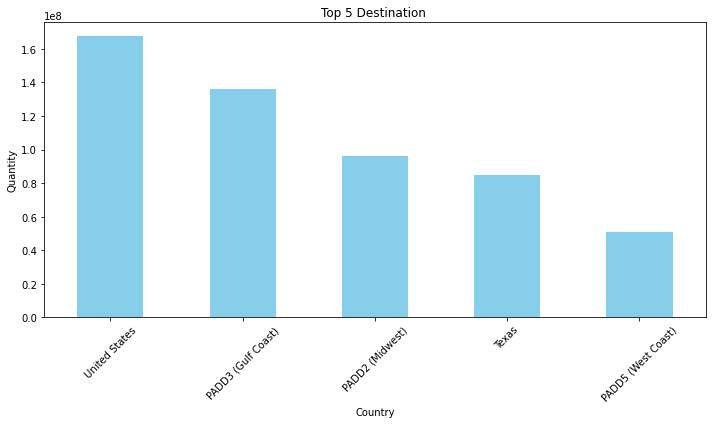

In [37]:
plt.figure(figsize=(10, 6))
top_5_dest.plot(kind='bar', color='skyblue')
plt.title('Top 5 Destination ')
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

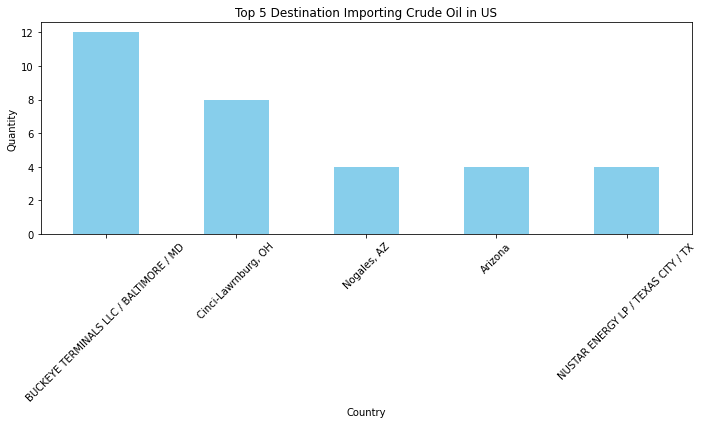

In [38]:
# Least 5 countries 
plt.figure(figsize=(10, 6))
qty_by_dest_sorted.tail(5).plot(kind='bar', color='skyblue')
plt.title('Top 5 Destination Importing Crude Oil in US')
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

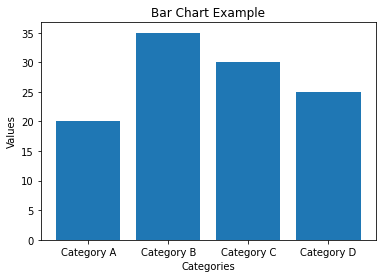

In [39]:
import matplotlib.pyplot as plt

# Sample data
categories = ['Category A', 'Category B', 'Category C', 'Category D']
values = [20, 35, 30, 25]

# Plotting the bar chart
plt.bar(categories, values)

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart Example')

# Displaying the plot
plt.show()

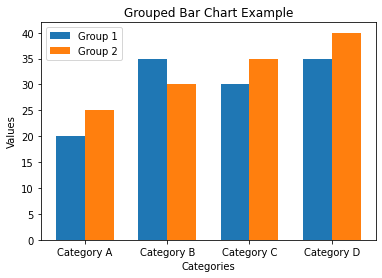

In [40]:
categories = ['Category A', 'Category B', 'Category C', 'Category D']
values1 = [20, 35, 30, 35]  # Values for the first group
values2 = [25, 30, 35, 40]  # Values for the second group

# Define the width of the bars
bar_width = 0.35

# Positions of bars on X-axis
x = np.arange(len(categories))

# Plotting the grouped bars
plt.bar(x - bar_width/2, values1, width=bar_width, label='Group 1')
plt.bar(x + bar_width/2, values2, width=bar_width, label='Group 2')

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Grouped Bar Chart Example')
plt.xticks(x, categories)
plt.legend()

# Displaying the plot
plt.show()

In [41]:
qty_per_gradeName = df.groupby('gradeName')['quantity'].sum()

In [42]:
qty_per_gradeName_sorted = qty_per_gradeName.sort_values(ascending = False)

In [43]:
qty_per_gradeName_sorted.head()

gradeName
Heavy Sour     598600688
Medium         372162574
Light Sweet     99507912
Light Sour      55276984
Heavy Sweet     45971240
Name: quantity, dtype: int64

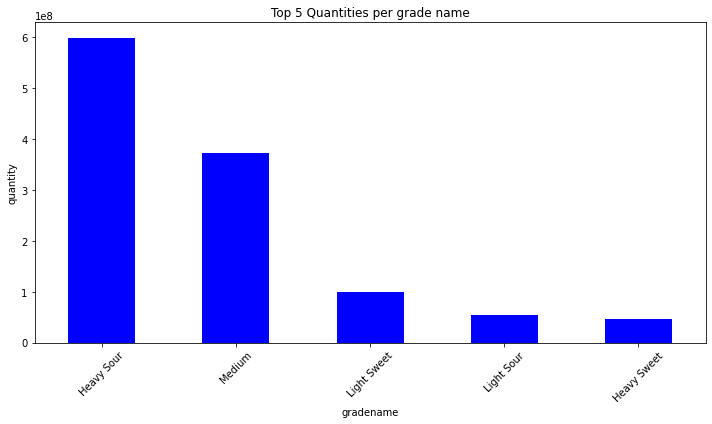

In [44]:
plt.figure(figsize = (10, 6))
qty_per_gradeName_sorted.head(5).plot(kind = "bar", color = "blue")
plt.title("Top 5 Quantities per grade name")
plt.xlabel("gradename")
plt.ylabel("quantity")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [45]:
# The Quantity of heavy sour crude oil is higher while Heavy sweet is the least. Let's explore the trend for eachof this grade

In [46]:
heavy_sour_df = df[df['gradeName'] == "Heavy Sour"]
heavy_sour_df.head()

,year,month,originName,originTypeName,destinationName,destinationTypeName,gradeName,quantity
19,2009,January,Syria,Country,MARATHON PETROLEUM CO LP / GALVESTON BAY / TX,Refinery,Heavy Sour,81
24,2009,January,Argentina,Country,BP PRODUCTS NORTH AMERICA / CHERRY POINT REFIN...,Refinery,Heavy Sour,394
27,2009,January,Ecuador,Country,EXXONMOBIL REFINING & SPLY CO / BEAUMONT / TX,Refinery,Heavy Sour,359
28,2009,January,Ecuador,Country,PAULSBORO REFINING CO LLC / PAULSBORO / NJ,Refinery,Heavy Sour,320
29,2009,January,Ecuador,Country,TESORO REFINING & MARKETING / GOLDEN EAGLE / CA,Refinery,Heavy Sour,986


In [47]:
heavy_sour_trend = heavy_sour_df[["year", "quantity"]]
heavy_sour_trend.head(3)

,year,quantity
19,2009,81
24,2009,394
27,2009,359


In [48]:
heavy_sour_trend_group = heavy_sour_trend.groupby("year")['quantity'].sum()
heavy_sour_trend_group

year
2009    37834440
2010    38552164
2011    39841200
2012    39058236
2013    38425576
2014    39968432
2015    42037772
2016    42664608
2017    44268924
2018    45033128
2019    39878888
2020    35683592
2021    35647248
2022    37539824
2023    38780280
2024     3386376
Name: quantity, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

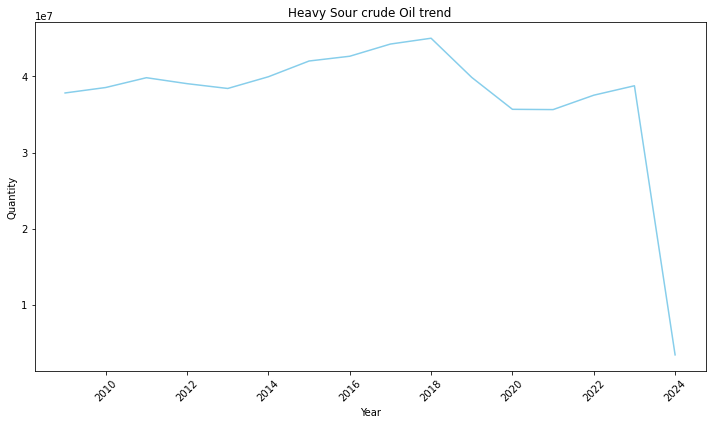

In [49]:
plt.figure(figsize = (10,6))
heavy_sour_trend_group.plot(kind = 'line', color = "skyblue")
plt.title("Heavy Sour crude Oil trend")
plt.xlabel("Year")
plt.ylabel("Quantity")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show

In [50]:
set(df["gradeName"].tolist())

{'Heavy Sour', 'Heavy Sweet', 'Light Sour', 'Light Sweet', 'Medium'}

In [51]:
# Lets determine the quantity exported by each country for each grade over the period

In [52]:
df.head(3)

,year,month,originName,originTypeName,destinationName,destinationTypeName,gradeName,quantity
0,2009,January,Belize,Country,EXXONMOBIL REFINING & SPLY CO / BEAUMONT / TX,Refinery,Light Sour,61
1,2009,January,Belize,Country,FLINT HILLS RESOURCES LP / WEST / TX,Refinery,Light Sour,62
2,2009,January,Algeria,Country,SHELL OIL PRODUCTS US / ST ROSE / LA,Refinery,Light Sweet,10


In [53]:
x = df.groupby("gradeName")['quantity'].sum()

In [54]:
country_grade = df.groupby(["originName","gradeName"])['quantity'].sum().unstack()

In [55]:
country_grade

gradeName,Heavy Sour,Heavy Sweet,Light Sour,Light Sweet,Medium
originName,,,,,
Africa,1000363.0,2341157.0,340648.0,14804685.0,9943486.0
Albania,34741.0,NaN,NaN,NaN,NaN
Algeria,3878.0,26131.0,53158.0,2998702.0,17087.0
Angola,780402.0,588630.0,7889.0,1354178.0,3417820.0
Argentina,48090.0,695177.0,19145.0,332297.0,17367.0
...,...,...,...,...,...
United Kingdom,734139.0,73381.0,283059.0,516082.0,25004.0
Venezuela,19361783.0,936418.0,58709.0,359842.0,1315202.0
Vietnam,3066.0,NaN,11753.0,180551.0,69608.0


In [56]:
country_grade_sorted = country_grade.sort_values(ascending=False)
country_grade_sorted

TypeError: sort_values() missing 1 required positional argument: 'by'

In [ ]:
plt.figure(figsize = (10,6))
country_grade_sorted.head(5).plot(kind = "bar", stacked = True)
plt.title('Quantity of crude with varying Impurities exported to US')
plt.xlabel("Grade Supplied by each country")
plt.ylabel("Quantity in barrel/day")
plt.xticks(rotation = 45)
# plt.show()
# Displaying the plot
plt.tight_layout()
plt.legend(title='Crude Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# # Filter the data for the period between 2009 and 2024
# filtered_data = df[(df['year'] >= 2009) & (df['year'] <= 2024)]

# # Group the data by country and crude type, and sum the quantity for each combination
# grouped_data = filtered_data.groupby(['country', 'crude_type'])['quantity'].sum().unstack()

# # Plotting the bar chart
# grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# # Adding labels and title
# plt.xlabel('Country')
# plt.ylabel('Quantity')
# plt.title('Quantity of Crude Oil Types by Country (2009-2024)')

# # Rotating x-axis labels for better readability
# plt.xticks(rotation=45)

# # Displaying the plot
# plt.tight_layout()
# plt.legend(title='Crude Type', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()

In [64]:
df_sorted = df.sort_values(by=['quantity'], ascending=False)
top_5 = df_sorted.head()
top_5

,year,month,originName,originTypeName,destinationName,destinationTypeName,gradeName,quantity
344943,2018,October,World,World,United States,United States,Heavy Sour,141016
257194,2016,January,World,World,United States,United States,Heavy Sour,140989
352401,2019,January,World,World,United States,United States,Heavy Sour,140611
296980,2017,April,World,World,United States,United States,Heavy Sour,140133
294441,2017,March,World,World,United States,United States,Heavy Sour,140107


In [ ]:
# # Create a stacked bar chart
# plt.bar(top_5_countries['Country'], top_5_countries['Crude_Oil_Type1'], label='Type1')
# plt.bar(top_5_countries['Country'], top_5_countries['Crude_Oil_Type2'], bottom=top_5_countries['Crude_Oil_Type1'], label='Type2')
# plt.bar(top_5_countries['Country'], top_5_countries['Crude_Oil_Type3'], bottom=top_5_countries['Crude_Oil_Type1']+top_5_countries['Crude_Oil_Type2'], label='Type3')

# # Set the x-axis labels and title
# plt.xticks(top_5_countries['Country'])
# plt.title('Top 5 Countries by Crude Oil Imports')

# # Add a legend and show the plot
# plt.legend()
# plt.show()

# This code assumes you have a CSV file called crude_oil_data.csv with the following columns:


In [ ]:
plt.bar(top_5['Country'], top_5_countries['Crude_Oil_Type1'], label='Type1')

In [65]:
y = df.groupby("originName")['quantity'].sum()

In [69]:
y.sort_values(ascending = False)

originName
World               292894791
Non-OPEC            198217089
Canada (Region)     119406217
Canada              119406217
OPEC                 94647819
                      ...    
Papua New Guinea         4767
Panama                   4354
South Africa             3619
Spain                    1358
Barbados                  350
Name: quantity, Length: 70, dtype: int64

In [70]:
len(df['originName'].tolist())

483053